In [21]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
from pymystem3 import Mystem
from sklearn.neighbors import NearestNeighbors

In [22]:
#get dataframe
news_df = pd.read_csv("data/news.csv")
le = LabelEncoder()
labels = le.fit_transform(news_df['class'])
news_df['class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Внутренняя политика: культура                    100
Проишествия  РФ                                  100
Спорт                                            100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

In [23]:
#Preprocess text
regex = re.compile(u"[А-Яа-я]+")
stop_words = stopwords.words("russian") + ['это', 'наш' , 'тыс', 'млн', 'млрд', u'также',  'т', 'д', '-', '-']

def words_only(text, regex = regex):
    return " ".join(regex.findall(text))

def  remove_stopwords(text, stop_words = stop_words):
    try:
        return u" ".join([token for token in text.split() if not token in stop_words])
    except:
        return u""

news_df.text = news_df.text.str.lower()
news_df.loc[:, 'text'] = news_df.text.apply(words_only)
news_df.text = news_df.text.apply(remove_stopwords)

In [24]:
#Distance matrix
tfId = TfidfVectorizer()
text = news_df.text.values
tfIdTexts = tfId.fit_transform(text)
distMatrix = cosine_distances(tfIdTexts)

[[Text(0.5, 0, ''),
  Text(44.5, 0, ''),
  Text(88.5, 0, ''),
  Text(132.5, 0, ''),
  Text(176.5, 0, ''),
  Text(220.5, 0, ''),
  Text(264.5, 0, ''),
  Text(308.5, 0, ''),
  Text(352.5, 0, ''),
  Text(396.5, 0, ''),
  Text(440.5, 0, ''),
  Text(484.5, 0, ''),
  Text(528.5, 0, ''),
  Text(572.5, 0, ''),
  Text(616.5, 0, ''),
  Text(660.5, 0, ''),
  Text(704.5, 0, ''),
  Text(748.5, 0, ''),
  Text(792.5, 0, ''),
  Text(836.5, 0, ''),
  Text(880.5, 0, ''),
  Text(924.5, 0, ''),
  Text(968.5, 0, ''),
  Text(1012.5, 0, ''),
  Text(1056.5, 0, ''),
  Text(1100.5, 0, ''),
  Text(1144.5, 0, ''),
  Text(1188.5, 0, ''),
  Text(1232.5, 0, ''),
  Text(1276.5, 0, ''),
  Text(1320.5, 0, ''),
  Text(1364.5, 0, ''),
  Text(1408.5, 0, ''),
  Text(1452.5, 0, ''),
  Text(1496.5, 0, ''),
  Text(1540.5, 0, ''),
  Text(1584.5, 0, ''),
  Text(1628.5, 0, ''),
  Text(1672.5, 0, ''),
  Text(1716.5, 0, ''),
  Text(1760.5, 0, ''),
  Text(1804.5, 0, ''),
  Text(1848.5, 0, ''),
  Text(1892.5, 0, '')],
 [Text(0, 0.5,

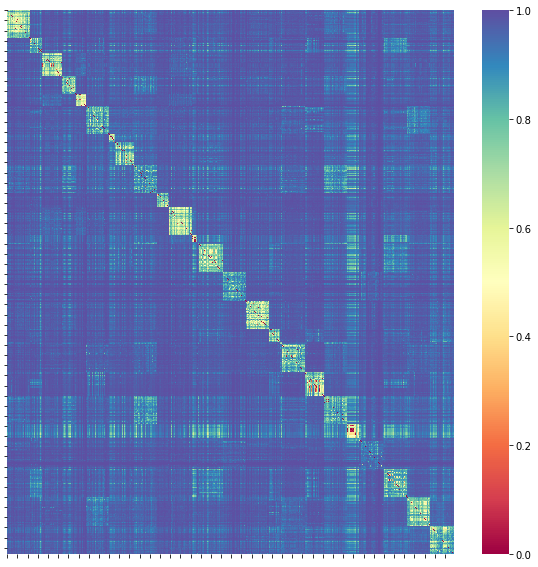

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(data=distMatrix, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

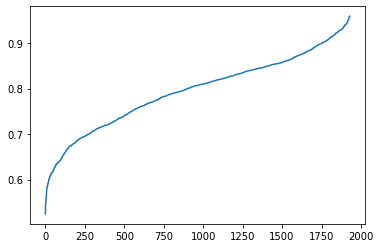

In [26]:
#calculate optimal epsilon
min_pts = 49
knn = NearestNeighbors(metric='cosine', n_neighbors=min_pts)
knn.fit(tfIdTexts)
dist, idx = knn.kneighbors(X=tfIdTexts, return_distance=True)
d2 = np.sort(dist[:,min_pts-1])
plt.plot(d2)

In [27]:
#Clasterization
dbscan = DBSCAN(metric='cosine', min_samples=49, eps=0.8)
dbscan.fit(tfIdTexts)
dbscan_labels = dbscan.labels_
news_df["labels"] = dbscan_labels

In [28]:
#analyze clasterization
pd.crosstab(news_df.loc[:, 'class'], dbscan_labels)

col_0,-1,0,1
class,,,
Важные мировые события,109,294,0
Внутренняя политика РФ,3,361,0
Внутренняя политика РФ: оппозиция,22,255,0
Внутренняя политика: культура,0,100,0
Международные отношения,12,141,0
Международные отношения: Криминальная хроника,0,82,0
Проишествия РФ,2,98,0
Спорт,88,12,0
Спорт,28,13,61


In [29]:
#rank clasterization
adjusted_rand_score(labels, dbscan_labels)

0.05594221508510157